In [26]:
# from google.colab import files

# # Upload the kaggle.json file that you downloaded
# uploaded = files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d priemshpathirana/fabric-stain-dataset

In [ ]:
# import zipfile
# import os

# # Specify the path to the downloaded zip file
# zip_file_path = '/content/fabric-stain-dataset.zip'

# # Specify the directory to extract the contents
# extracted_path = '/content/drive/MyDrive'

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

# # List the files in the extracted directory
# os.listdir(extracted_path)


Data Loading

In [3]:
import os
import cv2
import numpy as np

def load_and_preprocess_image(img_path):
    # Load image and preprocess it (resize, normalize, etc.)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Adjust the size as needed
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    return img

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = load_and_preprocess_image(img_path)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


Data Preparation

In [4]:
# Example usage:
defective_images, defective_labels = load_images_from_folder("/content/drive/MyDrive/Dataset/Fabric_img/stain", label=1)
clean_images_defect_free, clean_labels_defect_free = load_images_from_folder("/content/drive/MyDrive/Dataset/Fabric_img/defect_free", label=0)

# Combine data from both folders
all_images = np.concatenate([defective_images, clean_images_defect_free], axis=0)
all_labels = np.concatenate([defective_labels, clean_labels_defect_free], axis=0)

# Shuffle data
indices = np.arange(len(all_images))
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

# Split into training and validation sets
split = int(0.8 * len(all_images))
train_images, val_images = all_images[:split], all_images[split:]
train_labels, val_labels = all_labels[:split], all_labels[split:]


EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd

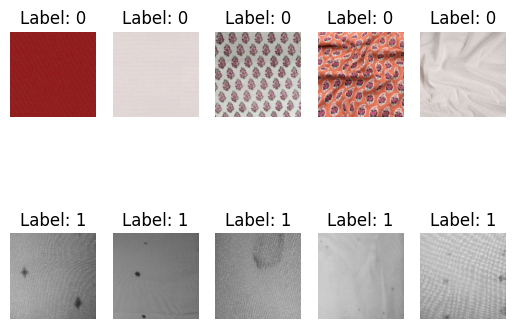

In [6]:
import matplotlib.pyplot as plt

def display_sample_images(images, labels, num_samples=5):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        class_images = images[labels == label][:num_samples]
        class_labels = labels[labels == label][:num_samples]
        for i in range(num_samples):
            plt.subplot(len(unique_labels), num_samples, i + 1 + label * num_samples)
            plt.imshow(class_images[i])
            plt.title(f"Label: {class_labels[i]}")
            plt.axis("off")
    plt.show()

# Display sample images from both folders
display_sample_images(all_images, all_labels)


In [7]:
# Shuffle data
indices = np.arange(len(all_images))
np.random.shuffle(indices)
shuffled_images = all_images[indices]
shuffled_labels = all_labels[indices]



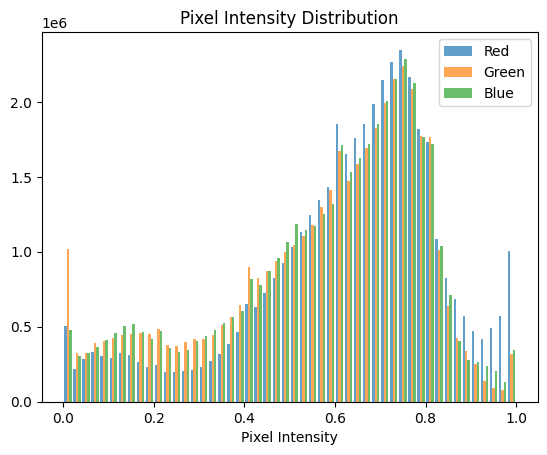

In [8]:
# Visualize pixel intensity distribution
pixel_intensities = shuffled_images.reshape(-1, 3)
plt.hist(pixel_intensities, bins=50, alpha=0.7, label=["Red", "Green", "Blue"])
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.legend()
plt.show()

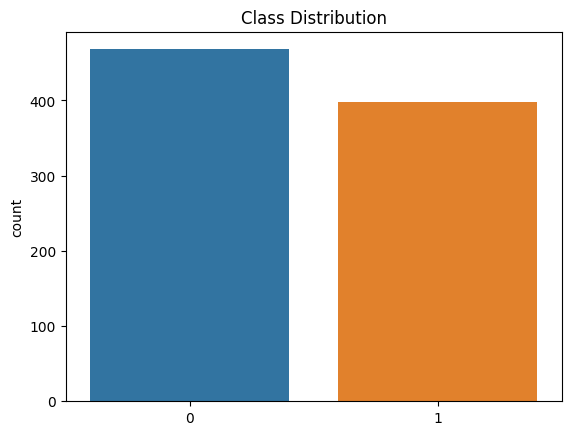

In [9]:
# Explore class-wise distribution of images
sns.countplot(x=shuffled_labels)
plt.title("Class Distribution")
plt.show()

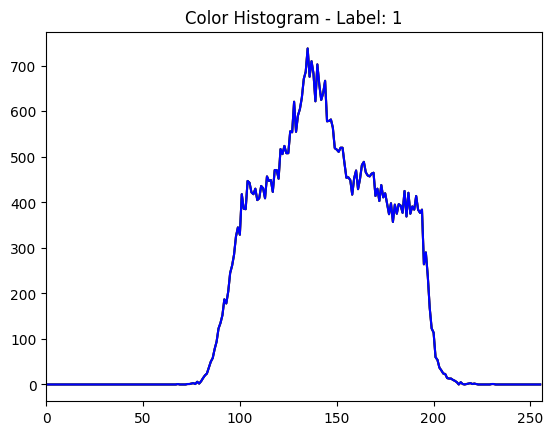

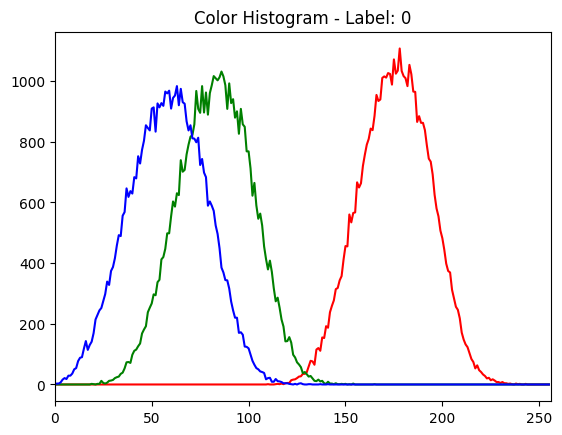

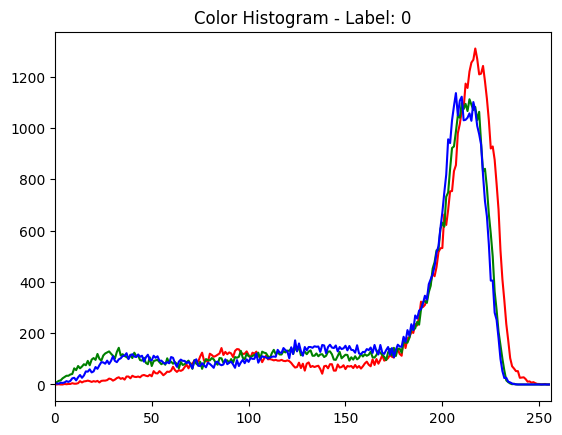

In [10]:
def plot_color_histogram(image, title):
    # Convert the image to uint8
    image = (image * 255).astype(np.uint8)

    # Split the image into channels
    channels = cv2.split(image)

    # Plot the histogram for each channel
    for i, col in enumerate(channels):
        histr = cv2.calcHist([col], [0], None, [256], [0, 256])
        plt.plot(histr, color=('r', 'g', 'b')[i])
        plt.xlim([0, 256])

    plt.title(title)
    plt.show()

# Display color histograms for a few sample images
num_sample_images = 3
for i in range(num_sample_images):
    plot_color_histogram(shuffled_images[i], f"Color Histogram - Label: {shuffled_labels[i]}")



Data pre-processing

In [11]:
import os
import cv2
import numpy as np

def load_and_preprocess_image(img_path):
    # Load image and preprocess it (resize, normalize, etc.)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Adjust the size as needed
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    return img

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = load_and_preprocess_image(img_path)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [12]:
# Example usage:
defective_images, defective_labels = load_images_from_folder("/content/drive/MyDrive/Dataset/Fabric_img/stain", label=1)
clean_images_defect_free, clean_labels_defect_free = load_images_from_folder("/content/drive/MyDrive/Dataset/Fabric_img/defect_free", label=0)

# Combine data from both folders
all_images = np.concatenate([defective_images, clean_images_defect_free], axis=0)
all_labels = np.concatenate([defective_labels, clean_labels_defect_free], axis=0)

# Shuffle data
indices = np.arange(len(all_images))
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

Data Spliting

In [13]:
# Split into training and validation sets
split = int(0.8 * len(all_images))
train_images, val_images = all_images[:split], all_images[split:]
train_labels, val_labels = all_labels[:split], all_labels[split:]

Model Building

In [15]:
import os
import cv2
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [16]:

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
22/22 [==============================] - 14s 84ms/step - loss: 4.7841 - accuracy: 0.5434 - val_loss: 0.5228 - val_accuracy: 0.7644
Epoch 2/10
22/22 [==============================] - 1s 39ms/step - loss: 0.5749 - accuracy: 0.6662 - val_loss: 0.5343 - val_accuracy: 0.7184
Epoch 3/10
22/22 [==============================] - 1s 41ms/step - loss: 0.5119 - accuracy: 0.7630 - val_loss: 0.4896 - val_accuracy: 0.7701
Epoch 4/10
22/22 [==============================] - 1s 39ms/step - loss: 0.5036 - accuracy: 0.7645 - val_loss: 0.4773 - val_accuracy: 0.7701
Epoch 5/10
22/22 [==============================] - 1s 39ms/step - loss: 0.5027 - accuracy: 0.7558 - val_loss: 0.4731 - val_accuracy: 0.8448
Epoch 6/10
22/22 [==============================] - 1s 38ms/step - loss: 0.4790 - accuracy: 0.7717 - val_loss: 0.4465 - val_accuracy: 0.8563
Epoch 7/10
22/22 [==============================] - 1s 39ms/step - loss: 0.4838 - accuracy: 0.7731 - val_loss: 0.4407 - val_accuracy: 0.8563
Epoch 8/10
2

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_images, val_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 [==============================] - 0s 16ms/step - loss: 0.5024 - accuracy: 0.7241
Test Accuracy: 72.41%


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load your pre-trained model
# model = tf.keras.models.load_model('your_model_path.h5')

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict the class of an image
def predict_image_class(model, img_path, threshold=0.5):
    img = preprocess_image(img_path)
    predictions = model.predict(img)
    predicted_class = int(predictions[0] > threshold)
    return predicted_class

# Example: Provide the path of an image to test
test_image_path = '/content/drive/MyDrive/Dataset/Fabric_img/defect_free/091073f6-6a62-4949-824c-2091d5c30e67-004.ppm'
predicted_class = predict_image_class(model, test_image_path)

# Display the result
if predicted_class == 0:
    print("Predicted class: Defect-Free")
else:
    print("Predicted class: Defective")


1/1 [==============================] - 0s 36ms/step
Predicted class: Defect-Free
